<a href="https://colab.research.google.com/github/hellodoksa/machine-learning-Project/blob/master/KerasDeeplearning_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM을 배워보자!
- LSTM은 한 층안에서 반복을 많이 해야 하는 RNN의 특성상 일반 신경망 보다 
기울기 소실 문제가 더 많이 발생하고 이를 해결하기 어렵다는 단점을 보완한 방법이다.!



In [0]:
from keras.datasets import reuters
import numpy 
from keras.utils import np_utils

In [0]:
## 20%를 테스트 셋으롤 생성하자 
(x_train,y_train) ,(x_test,y_test) = reuters.load_data(num_words= 1000, test_split=0.2) 


In [0]:
## 데이터 아에서 해당 단어가 몇번이나 나타나는지 세어 빈도에 따라 번호를 붙임 
## num_words : 빈도가 1~ 1000에 해당하는 단어만 불러온다. 

category = numpy.max(y_train) +1  ##y_train의 종류를 구함 
print(category ,": 카테고리" )
print(len(x_train) , "학습용 뉴스 기사 ")
print(len(x_test) , ": 테스트용 뉴스 기사 ")
print(x_train[0])

46 : 카테고리
8982 학습용 뉴스 기사 
2246 : 테스트용 뉴스 기사 
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [0]:
# 각 기사들의 단어 수가 다르므로 이를 동일하게 맞춰줘야 한다. (전처리 과정 )
from keras.preprocessing import sequence

In [0]:
# 데이터 전처리 
# maxlen : 단어 수를 100개로 맞춰라 
x_train = sequence.pad_sequences(x_train , maxlen=100)
x_test  = sequence.pad_sequences(x_test , maxlen=100)

# 원핫 인코딩 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [0]:
## 모델 만들자잉 
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Embedding 
model = Sequential()

# Embedding : 데이터 전처리 과정을 통해 입력된 값을 받아 다음 층이 알아들을 수 있는 형태로 반환 
# (불러온 단어의 총 개수 , 기사당 언어의 수 )
model.add(Embedding(1000, 100))

# LSTM : RNN에서 기억 값에 대한 가중치를 제어 
# LSTM(기사당 단어의 수 , 기타 옵션 ) , 활성화 함수는 tanh를  사용 
model.add(LSTM(100,activation='tanh'))
model.add(Dense(46,activation='softmax'))

In [0]:
#모델 컴파일 
model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

# 모델의 실행 
history = model.fit(x_train, y_train , batch_size=100, epochs =20 , validation_data=(x_test,y_test))

# 테스트 정확도 출력
print("\n Test Accuracy : %.4f" % (model.evaluate(x_test,y_test)[1]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 25s 3ms/step - loss: 2.4497 - accuracy: 0.4183 - val_loss: 2.0505 - val_accuracy: 0.5004
Epoch 2/20
8982/8982 [==============================] - 24s 3ms/step - loss: 2.0659 - accuracy: 0.4767 - val_loss: 1.9796 - val_accuracy: 0.5102
Epoch 3/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.8374 - accuracy: 0.5296 - val_loss: 1.8376 - val_accuracy: 0.5387
Epoch 4/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.7262 - accuracy: 0.5561 - val_loss: 1.7359 - val_accuracy: 0.5619
Epoch 5/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.6584 - accuracy: 0.5668 - val_loss: 1.6929 - val_accuracy: 0.5775
Epoch 6/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.6092 - accuracy: 0.5841 - val_loss: 1.6256 - val_accuracy: 0.5917
Epoch 7/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.528

# LSTM과 CNN의 조합을 이용하여 영화 리뷰 분류 

In [0]:
from keras.preprocessing import sequence 
from keras.models import Sequential 
from keras.layers import Dense , Dropout, Activation
from keras.layers import Embedding 
from keras.layers import LSTM 
from keras.layers import Conv1D , MaxPooling1D
from keras.datasets import imdb

import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [0]:
# seed 값 설정 
seed = 0 
numpy.random.seed(seed)
tf.random.set_seed(3)

In [0]:
# 학습셋과 데이터 셋 지정하기 
(xtrain, ytrain),(xtest,ytest) = imdb.load_data(num_words = 500 )

# 데이터 전처리 
xtrain = sequence.pad_sequences(xtrain, maxlen = 100)
xtest = sequence.pad_sequences(xtest, maxlen = 100)


In [0]:
#모델의 설정 
model = Sequential()
model.add(Embedding(5000 , 100))
model.add(Dropout(0.5))
model.add(Conv1D(64 , 5, padding='valid' , activation = 'relu', strides = 1 ))
model.add(MaxPooling1D(pool_size = 4 ))
model.add(LSTM(55))
model.add(Dense(1)) 
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                

In [0]:
#모델 컴파일 
model.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics=['accuracy'])

# 모델의 실행
history = model.fit(xtrain,ytrain, batch_size = 100, epochs=5, validation_data=(xtest,ytest))

#정확도 출력 
print("\n Test Accuracy : %.4f" % (model.evaluate(xtest,ytest)[1]))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 31s 1ms/step - loss: 0.5239 - accuracy: 0.7158 - val_loss: 0.4398 - val_accuracy: 0.7994
Epoch 2/5
25000/25000 [==============================] - 31s 1ms/step - loss: 0.4208 - accuracy: 0.8039 - val_loss: 0.4067 - val_accuracy: 0.8136
Epoch 3/5
25000/25000 [==============================] - 31s 1ms/step - loss: 0.4017 - accuracy: 0.8158 - val_loss: 0.4039 - val_accuracy: 0.8148
Epoch 4/5
25000/25000 [==============================] - 31s 1ms/step - loss: 0.3827 - accuracy: 0.8249 - val_loss: 0.3954 - val_accuracy: 0.8209
Epoch 5/5
25000/25000 [==============================] - 7s 281us/step

 Test Accuracy : 0.8230


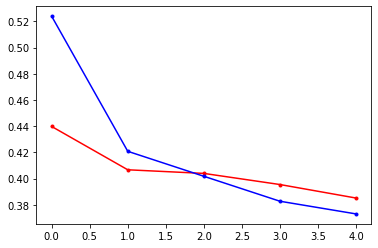

In [0]:
# 테스트셋의 오차 
yvloss = history.history['val_loss']

# 학습셋의 오차
yloss = history.history['loss']

#그래프로 표현 
x_len = np.arange(len(yloss))
plt.plot(x_len , yvloss ,marker = '.' , c="red", label ='TestSet_loss')
plt.plot(x_len , yloss  ,marker = '.' , c="blue", label ='TrainSet_loss')

In [0]:
# 그래프에 그리드를 주고 레이블 표시 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()